In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Масив значень y
y = np.array([10, 12, 14, 16, 18])

# Створимо x як просто константу (модель y ~ 1)
X = np.ones((len(y), 1))

# Навчаємо регресію
model = LinearRegression(fit_intercept=False).fit(X, y)

print(f"Regression coefficient: {model.coef_[0]}")
print(f"Mean of y: {np.mean(y)}")

Regression coefficient: 13.999999999999996
Mean of y: 14.0


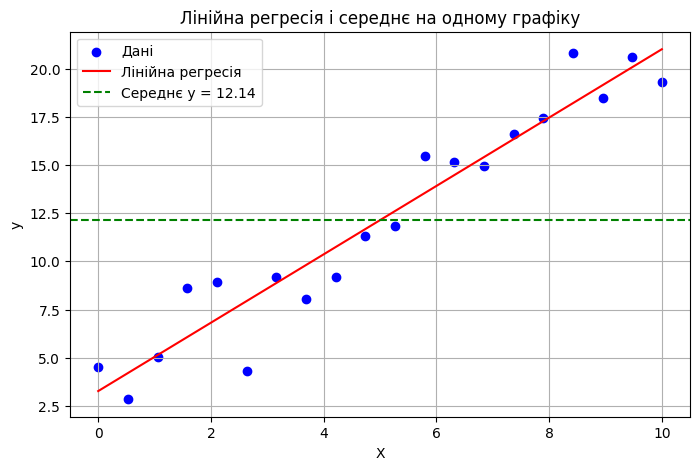

In [16]:
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2 * X.flatten() + 1 + np.random.normal(0, 2, size=X.shape[0])

# Лінійна регресія
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Середнє y
mean_y = np.mean(y)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Дані")
plt.plot(X, y_pred, color="red", label="Лінійна регресія")
plt.axhline(mean_y, color="green", linestyle="--", label=f"Середнє y = {mean_y:.2f}")

plt.title("Лінійна регресія і середнє на одному графіку")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

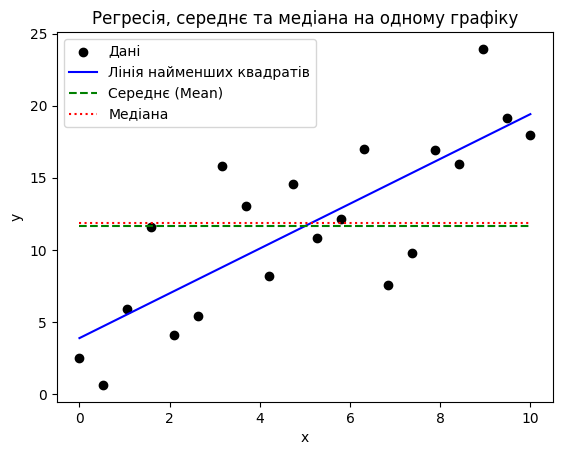

In [19]:
# Випадкові дані з шумом
np.random.seed(42)
x = np.linspace(0, 10, 20)
y = 2.5 * x + np.random.normal(0, 5, size=x.shape)  # тренд + шум

# Підготовка для регресії
X = x.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Лінія середнього (mean) — горизонтальна
y_mean = np.full_like(x, y.mean())

# Лінія медіани — горизонтальна
y_median = np.full_like(x, np.median(y))

plt.scatter(x, y, label="Дані", color="black")

# Малюємо лінію регресії (лінію найменших квадратів)
plt.plot(x, y_pred, label="Лінія найменших квадратів", color="blue")

# Малюємо лінію середнього
plt.plot(x, y_mean, label="Середнє (Mean)", color="green", linestyle="--")

# Малюємо лінію медіани
plt.plot(x, y_median, label="Медіана", color="red", linestyle=":")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Регресія, середнє та медіана на одному графіку")
plt.show()

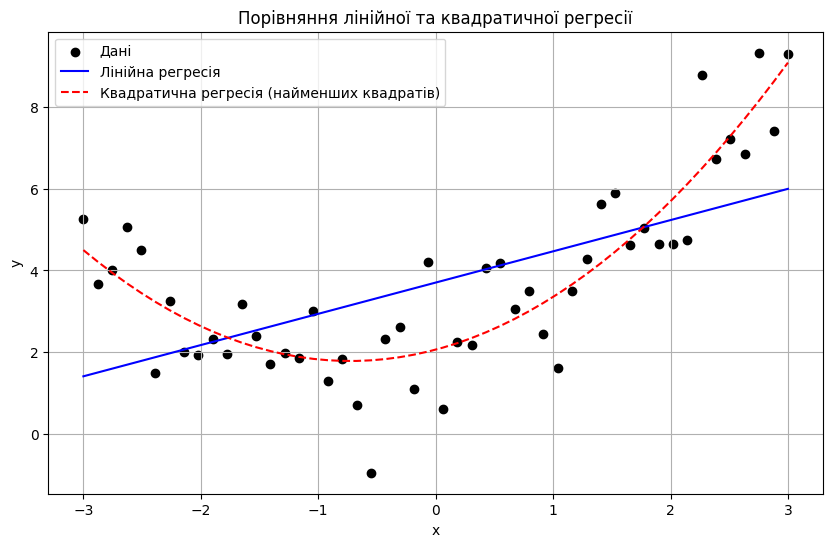

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Генеруємо нелінійні дані
np.random.seed(0)
x = np.linspace(-3, 3, 50)
y = 0.5 * x**2 + x + 2 + np.random.randn(50)  # квадратичний тренд + шум

# Лінійна регресія (y = mx + b)
X_lin = x.reshape(-1, 1)
lin_reg = LinearRegression().fit(X_lin, y)
y_lin_pred = lin_reg.predict(X_lin)

# Поліноміальна регресія (y = ax^2 + bx + c)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_lin)
poly_reg = LinearRegression().fit(X_poly, y)
y_poly_pred = poly_reg.predict(X_poly)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="black", label="Дані")

plt.plot(x, y_lin_pred, color="blue", label="Лінійна регресія")
plt.plot(
    x,
    y_poly_pred,
    color="red",
    linestyle="--",
    label="Квадратична регресія (найменших квадратів)",
)

plt.title("Порівняння лінійної та квадратичної регресії")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

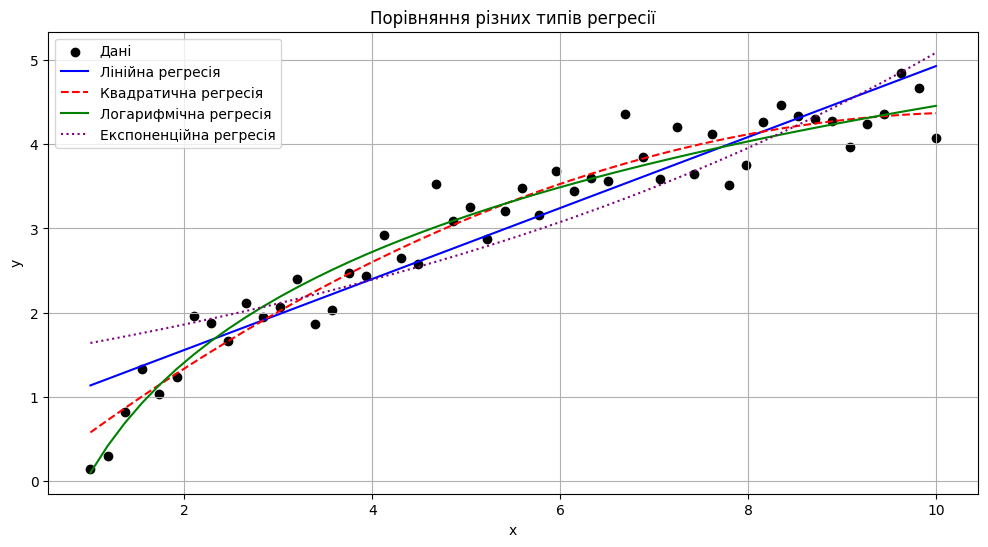

In [21]:
from scipy.optimize import curve_fit

# Дані: x та y з експоненційним трендом + шум
np.random.seed(42)
x = np.linspace(1, 10, 50)
y_true = 2 * np.log(x) + np.random.normal(0, 0.3, size=x.shape)

# Для лінійної регресії
X_lin = x.reshape(-1, 1)
lin_reg = LinearRegression().fit(X_lin, y_true)
y_lin_pred = lin_reg.predict(X_lin)

# Квадратична регресія
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X_lin)
poly2_reg = LinearRegression().fit(X_poly2, y_true)
y_poly2_pred = poly2_reg.predict(X_poly2)


# Логарифмічна регресія: y = a * log(x) + b
def log_func(x, a, b):
    return a * np.log(x) + b


params_log, _ = curve_fit(log_func, x, y_true)
y_log_pred = log_func(x, *params_log)


# Експоненційна регресія: y = a * exp(b * x)
def exp_func(x, a, b):
    return a * np.exp(b * x)


try:
    params_exp, _ = curve_fit(exp_func, x, y_true, maxfev=10000)
    y_exp_pred = exp_func(x, *params_exp)
    exp_valid = True
except:
    y_exp_pred = np.zeros_like(x)
    exp_valid = False

# Візуалізація
plt.figure(figsize=(12, 6))
plt.scatter(x, y_true, color="black", label="Дані")

plt.plot(x, y_lin_pred, label="Лінійна регресія", color="blue")
plt.plot(x, y_poly2_pred, label="Квадратична регресія", color="red", linestyle="--")
plt.plot(x, y_log_pred, label="Логарифмічна регресія", color="green")

if exp_valid:
    plt.plot(
        x,
        y_exp_pred,
        label="Експоненційна регресія",
        color="purple",
        linestyle="dotted",
    )

plt.title("Порівняння різних типів регресії")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()